# EDA Project 

# Data ingestion 

In [75]:
import pandas as pd
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\laptop.csv")
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


# step 2 perform basic quality check 

In [76]:
df.shape

(823, 19)

In [77]:
df.duplicated().sum()

np.int64(21)

In [78]:
# remove the duplicated 
df = df.drop_duplicates(keep="first").reset_index(drop=True)

In [79]:
df.shape

(802, 19)

In [80]:
df.duplicated().sum()

np.int64(0)

In [81]:
df.isna().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

# no mission values are there in data 

# Step 3  perform Descriptive statistics 

In [82]:
a = df.describe(include="number").T
a

,count,mean,std,min,25%,50%,75%,max
Price,802.0,76625.543641,45232.984422,16990.0,45990.0,63990.0,89525.00,441990.0
Number of Ratings,802.0,299.844140,1001.784420,0.0,0.0,17.0,140.25,15279.0
Number of Reviews,802.0,36.089776,118.313553,0.0,0.0,2.0,18.00,1947.0


In [83]:
a["range"]= a["max"]-a["min"]
a

,count,mean,std,min,25%,50%,75%,max,range
Price,802.0,76625.543641,45232.984422,16990.0,45990.0,63990.0,89525.00,441990.0,425000.0
Number of Ratings,802.0,299.844140,1001.784420,0.0,0.0,17.0,140.25,15279.0,15279.0
Number of Reviews,802.0,36.089776,118.313553,0.0,0.0,2.0,18.00,1947.0,1947.0


In [84]:
a["iqr"] = a["75%"]-a["25%"]
a

,count,mean,std,min,25%,50%,75%,max,range,iqr
Price,802.0,76625.543641,45232.984422,16990.0,45990.0,63990.0,89525.00,441990.0,425000.0,43535.00
Number of Ratings,802.0,299.844140,1001.784420,0.0,0.0,17.0,140.25,15279.0,15279.0,140.25
Number of Reviews,802.0,36.089776,118.313553,0.0,0.0,2.0,18.00,1947.0,1947.0,18.00


In [85]:
df.describe(include="object").T

,count,unique,top,freq
brand,802,8,ASUS,243
processor_brand,802,3,Intel,594
processor_name,802,11,Core i5,284
processor_gnrtn,802,8,11th,328
ram_gb,802,4,8 GB,404
ram_type,802,6,DDR4,690
ssd,802,7,512 GB,389
hdd,802,4,0 GB,602
os,802,3,Windows,763
os_bit,802,2,64-bit,693


# Step 4 data visualization
1. univariate - Categorical Countplot ,numerical -histplot/kdeplot

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
cat_cols= df.select_dtypes(include="object").columns.tolist()
cat_cols

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

In [88]:
num_cols = df.select_dtypes(include="number").columns.tolist()

In [89]:
df["brand"].value_counts()

brand
ASUS      243
DELL      149
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      23
Avita       6
Name: count, dtype: int64

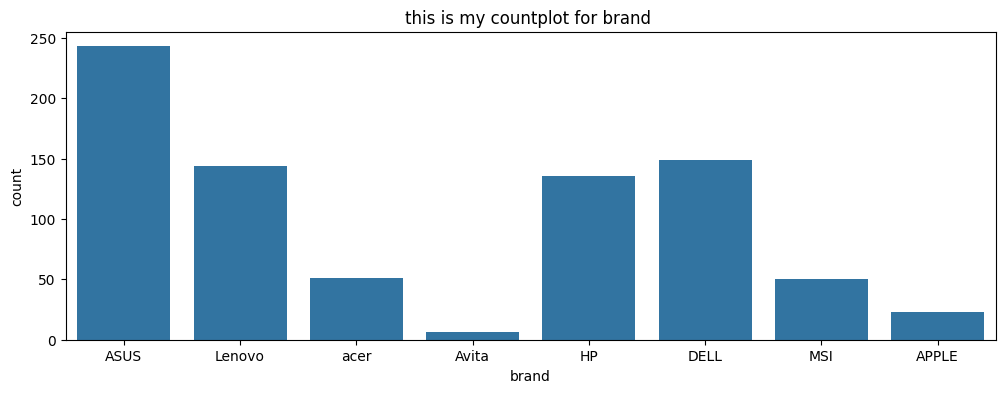

In [90]:
plt.figure(figsize=(12,4))
sns.countplot(df,x="brand")
plt.title("this is my countplot for brand ")
plt.show()

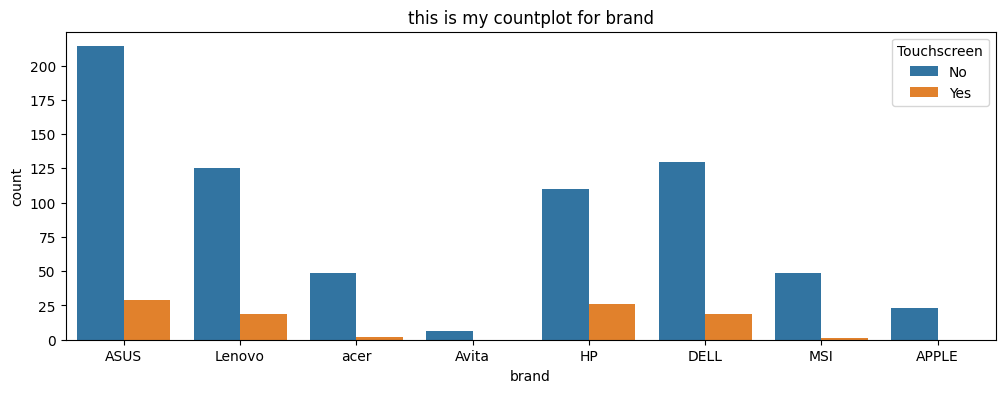

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

In [91]:
plt.figure(figsize=(12,4))
sns.countplot(df,x="brand",hue="Touchscreen")
plt.title("this is my countplot for brand")
plt.show()
cat_cols

# show the countplot for ratings ,Weight

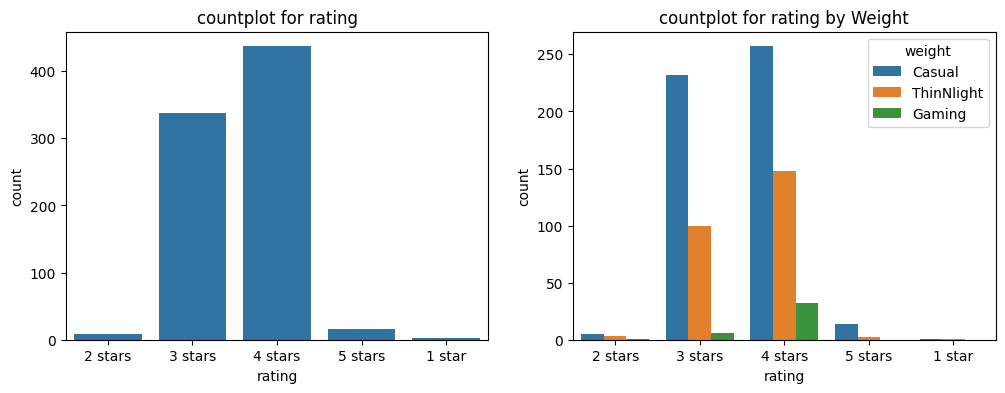

In [92]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(df,x="rating")
plt.title("countplot for rating")

plt.subplot(1,2,2)
sns.countplot(df,x="rating",hue="weight")
plt.title("countplot for rating by Weight")
plt.show()


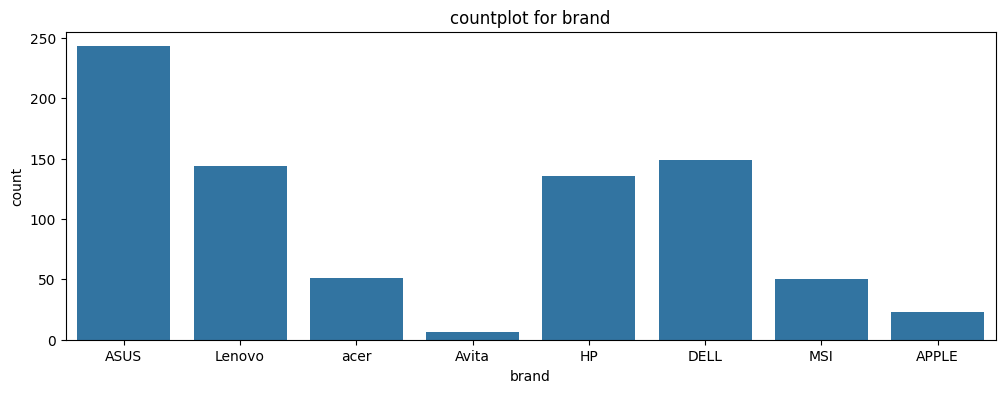

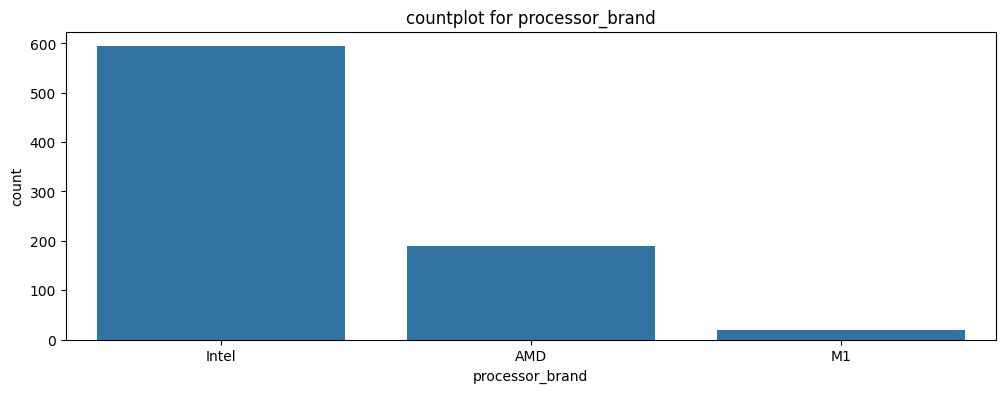

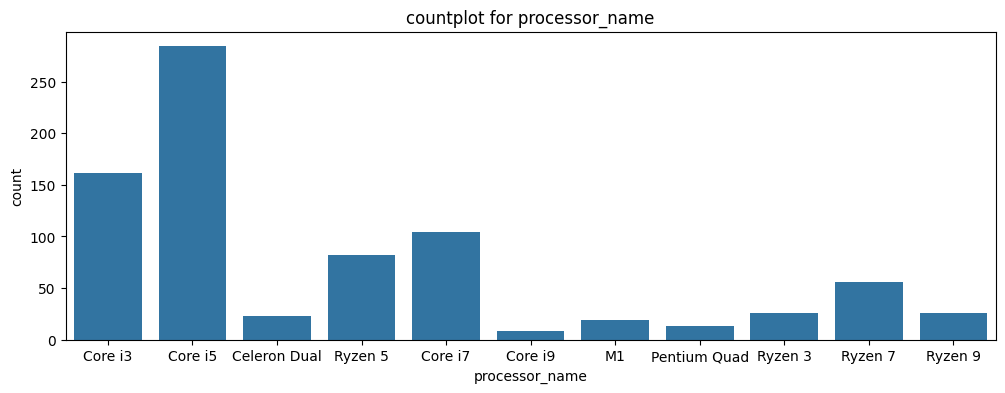

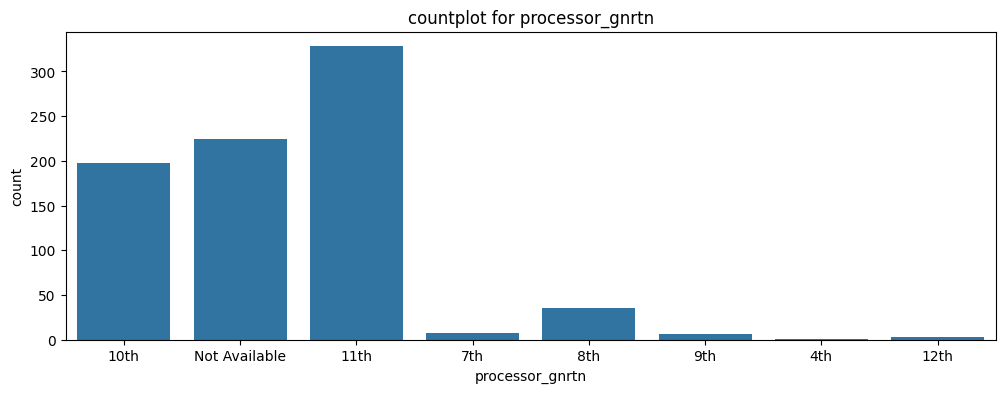

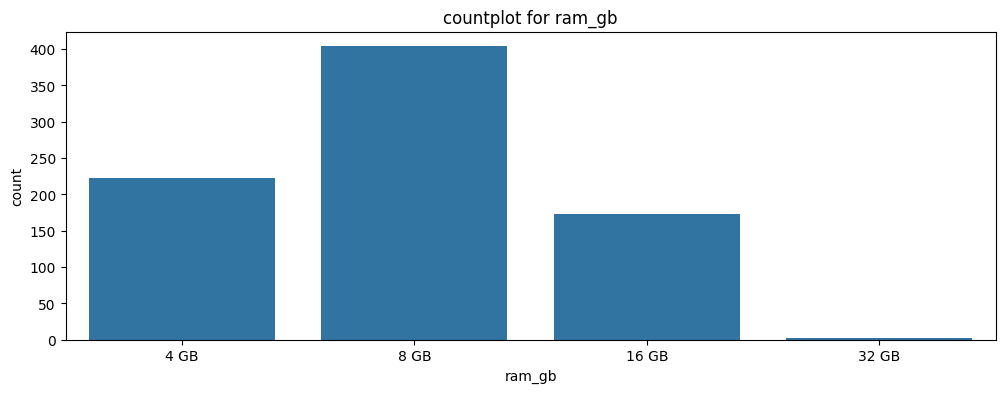

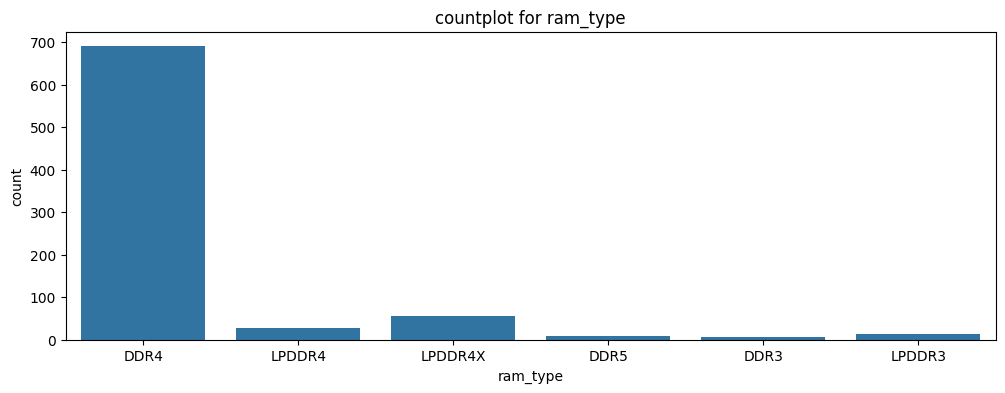

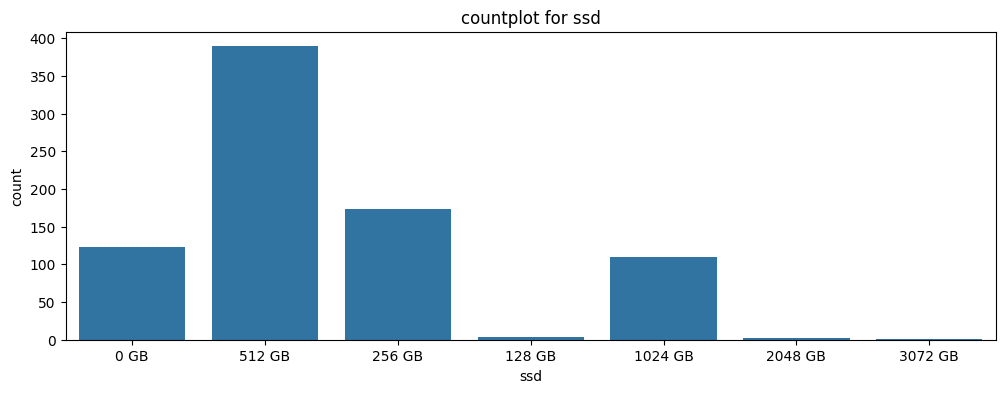

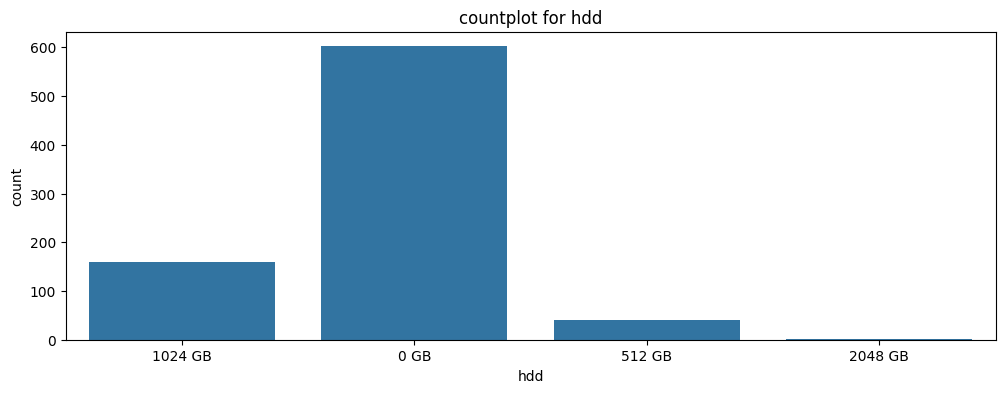

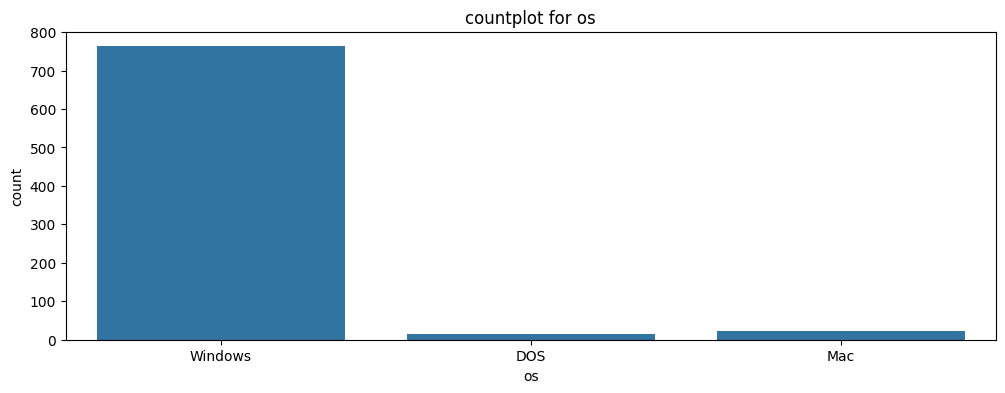

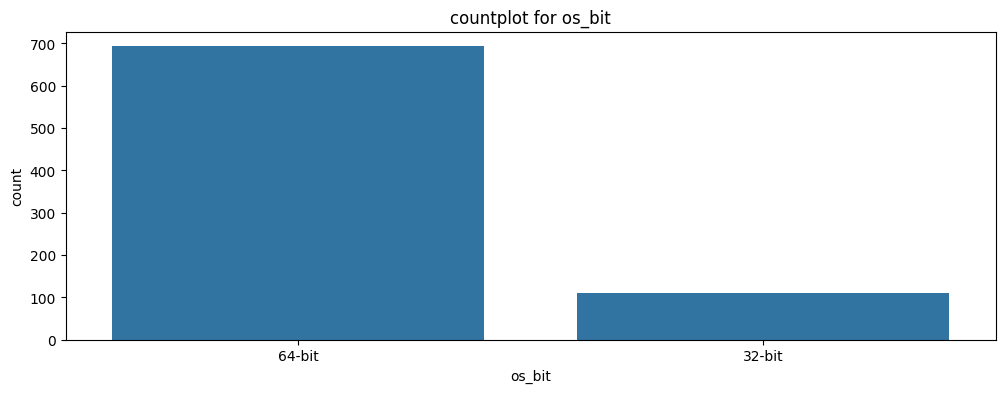

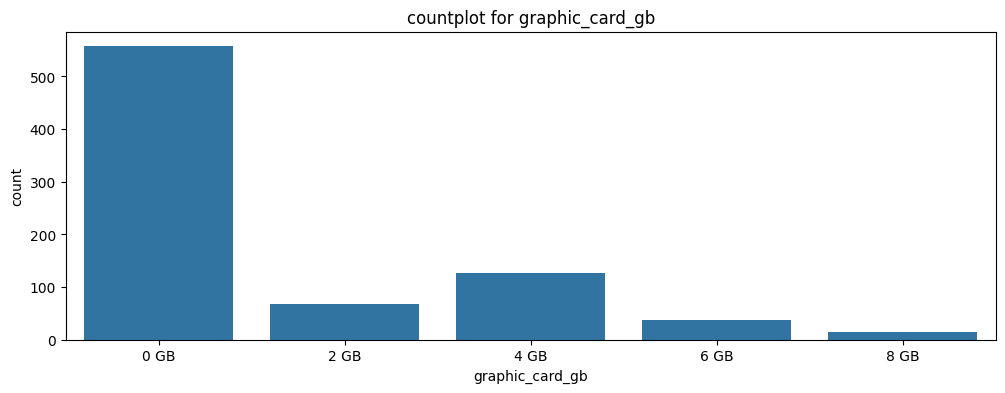

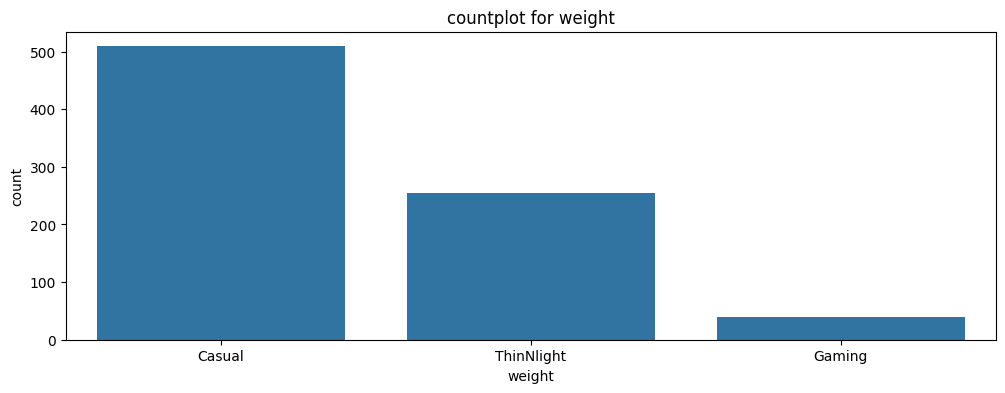

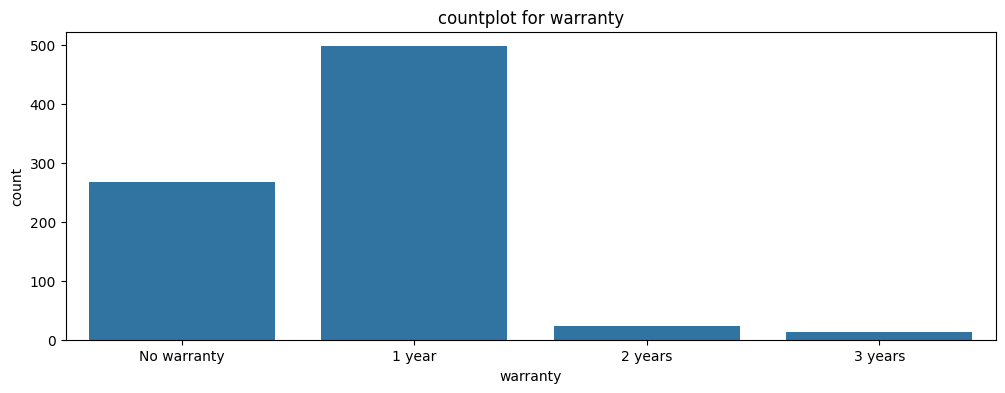

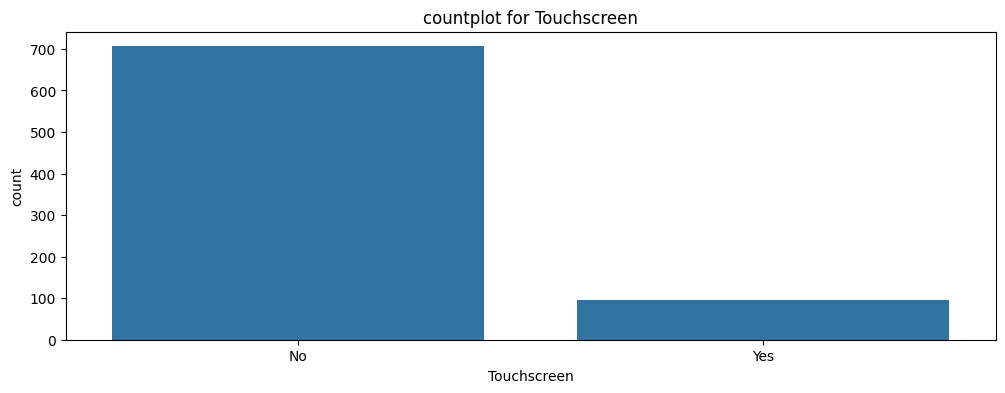

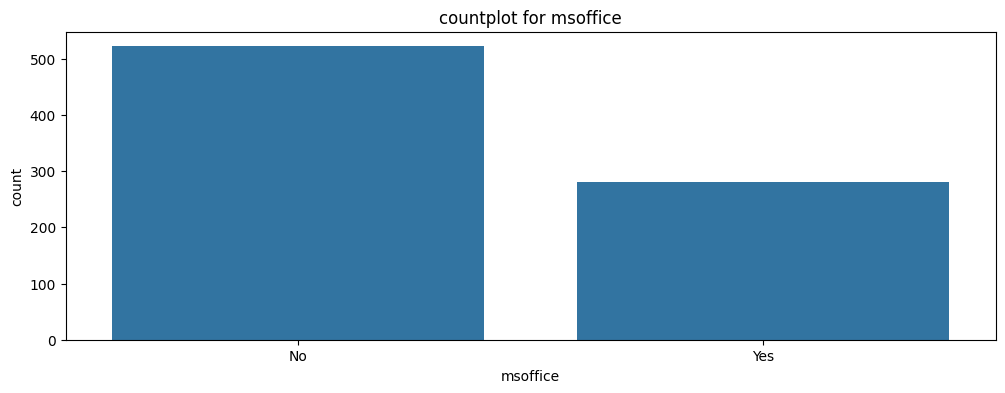

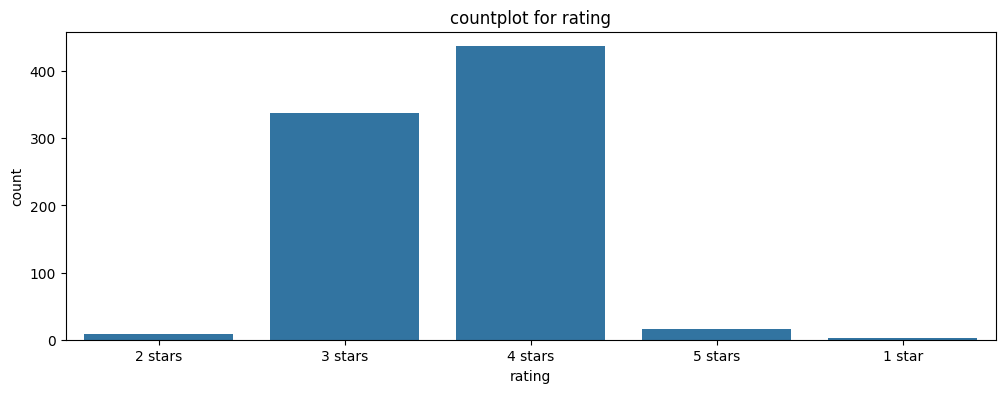

In [93]:
for col in cat_cols:
    plt.figure(figsize=(12,4))
    sns.countplot(df,x=col)
    plt.title(f"countplot for {col}")
    plt.show()

# Numerical columns Histplot or kdeplot

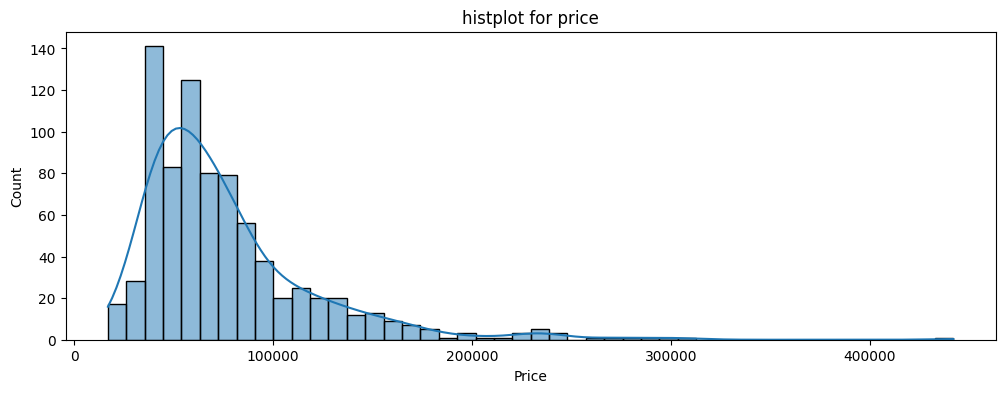

In [94]:
plt.figure(figsize=(12,4))
sns.histplot(df,x="Price",kde=True)
plt.title("histplot for price")
plt.show()


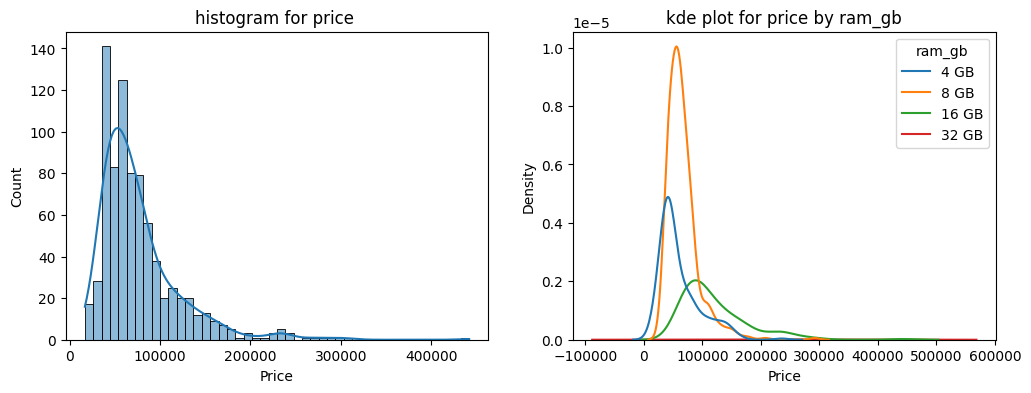

In [95]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df,x="Price",kde=True)
plt.title("histogram for price ")

plt.subplot(1,2,2)
sns.kdeplot(df,x="Price",hue="ram_gb")
plt.title("kde plot for price by ram_gb")
plt.show()


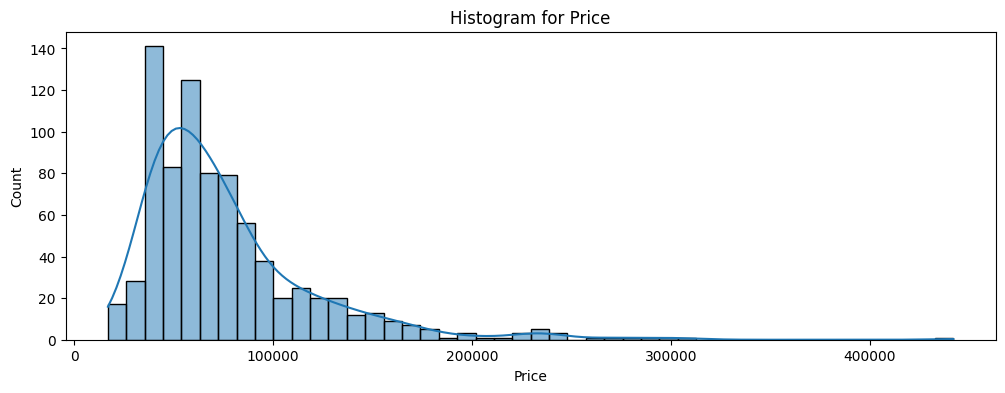

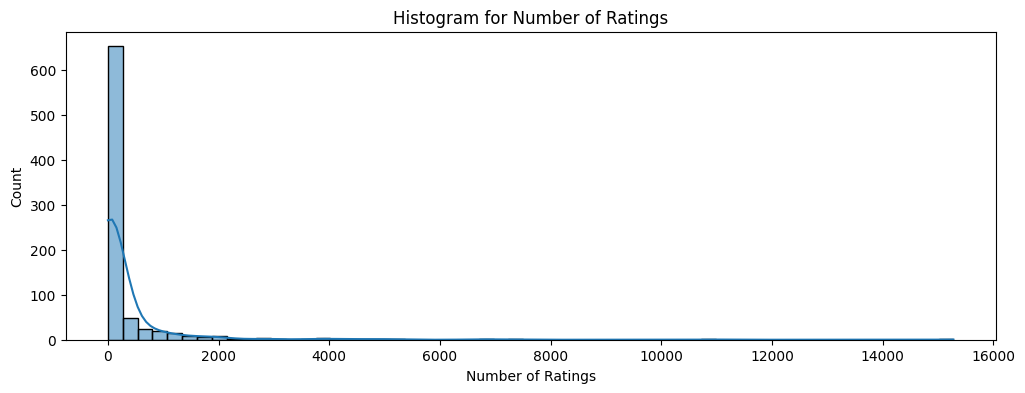

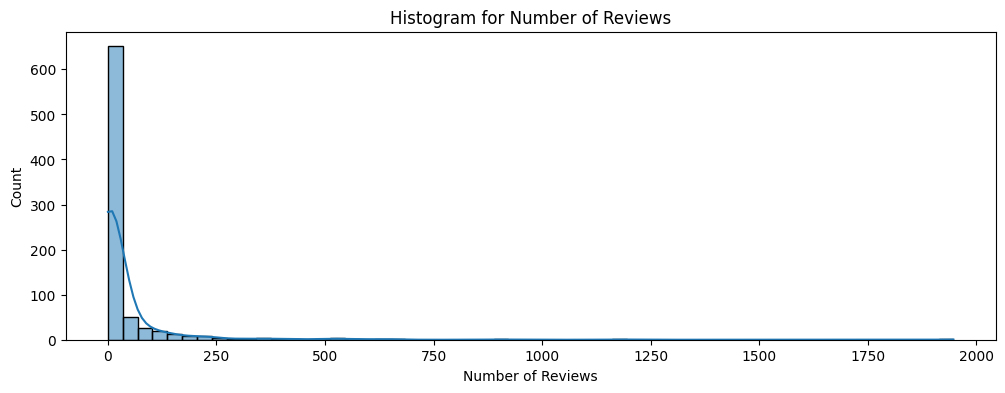

In [96]:
for col in num_cols:
    plt.figure(figsize=(12,4))
    sns.histplot(df,x=col,kde=True)
    plt.title(f"Histogram for {col}")
    plt.show()

# biavariate analysis 
1. num vs num ->scatterplot/regplot
2. cat-num-> boxplot/violinplot
3. cat vs cat -> crosstab/heatmap


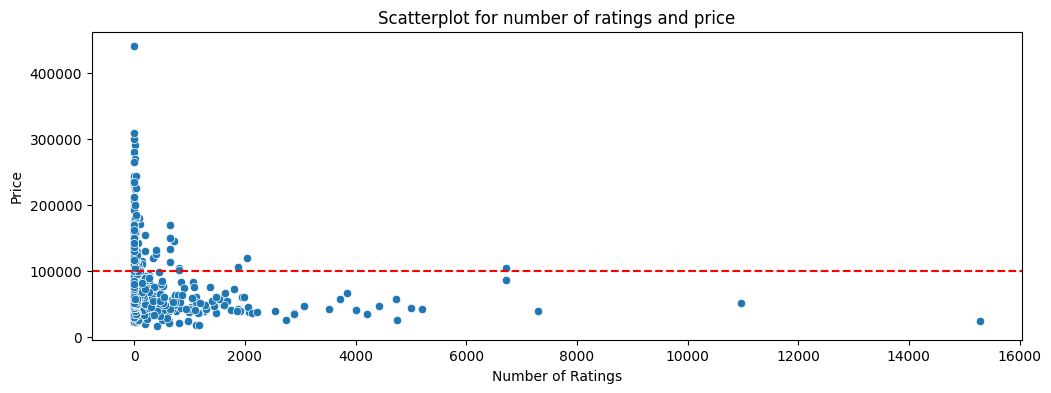

In [97]:
plt.figure(figsize=(12,4))
sns.scatterplot(df,x="Number of Ratings",y="Price")
plt.title("Scatterplot for number of ratings and price")
plt.axhline(y=1_00_000,linestyle="--",color="red")
plt.show()


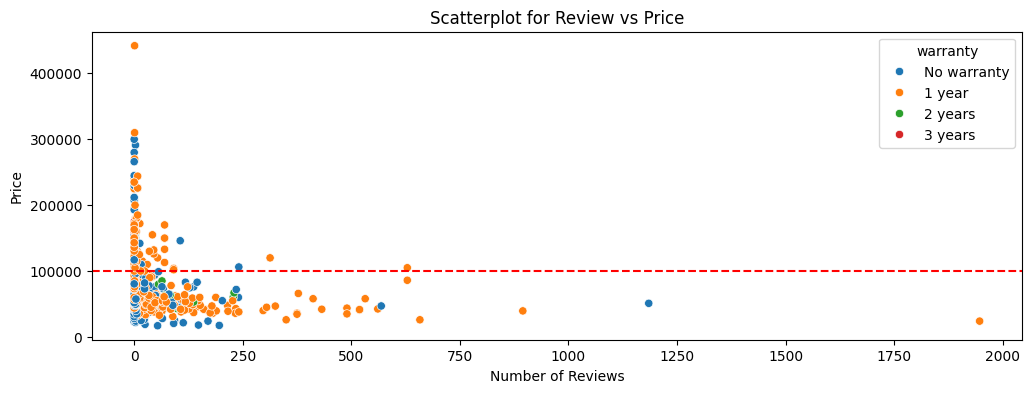

In [98]:
plt.figure(figsize=(12,4))
sns.scatterplot(df,x="Number of Reviews",y="Price",hue="warranty")
plt.title("Scatterplot for Review vs Price")
plt.axhline(y=1_00_000,linestyle="--",color="red")
plt.show()

# show the number of ratings vs reviews 

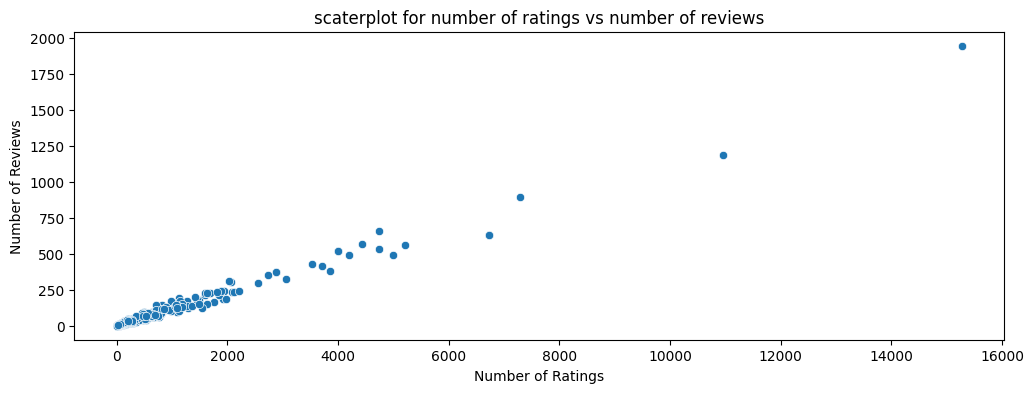

In [99]:
plt.figure(figsize=(12,4))
sns.scatterplot(df,x="Number of Ratings",y="Number of Reviews")
plt.title("scaterplot for number of ratings vs number of reviews")
plt.show()

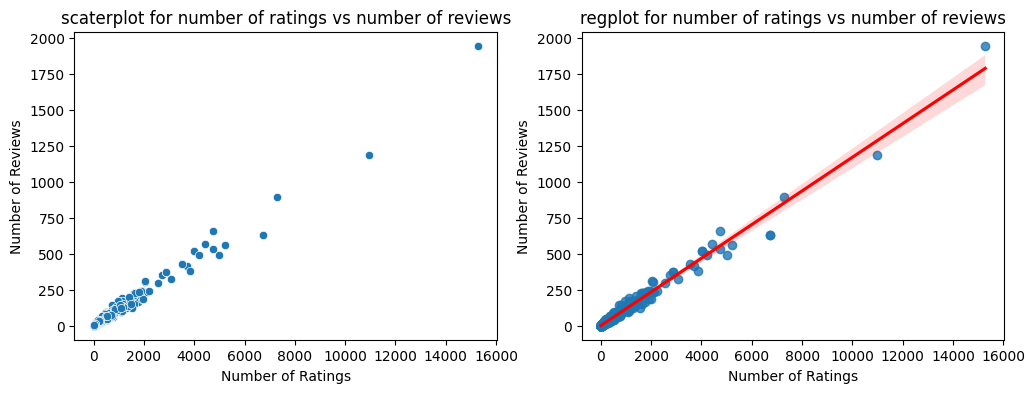

In [100]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(df,x="Number of Ratings",y="Number of Reviews")
plt.title("scaterplot for number of ratings vs number of reviews")

plt.subplot(1,2,2)
sns.regplot(df,x="Number of Ratings",y="Number of Reviews",line_kws={"color":"red"})
plt.title("regplot for number of ratings vs number of reviews")
plt.show()

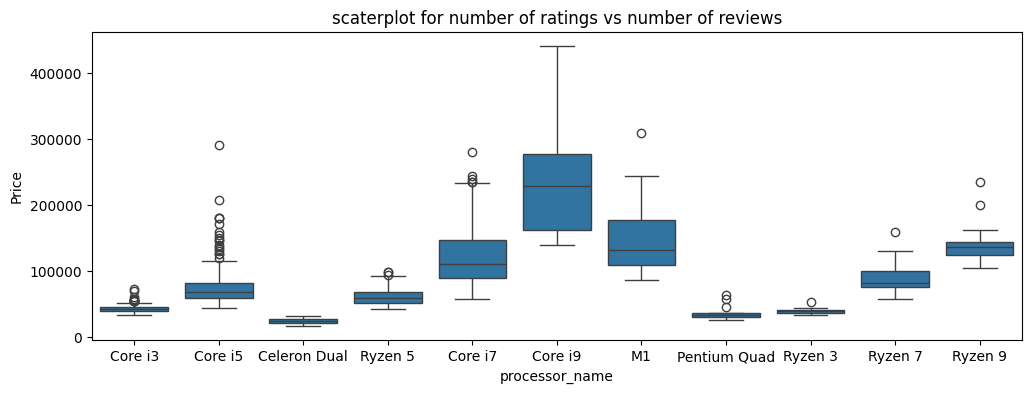

In [101]:
plt.figure(figsize=(12,4))
sns.boxplot(df,x="processor_name",y="Price")
plt.title("scaterplot for number of ratings vs number of reviews")
plt.show()

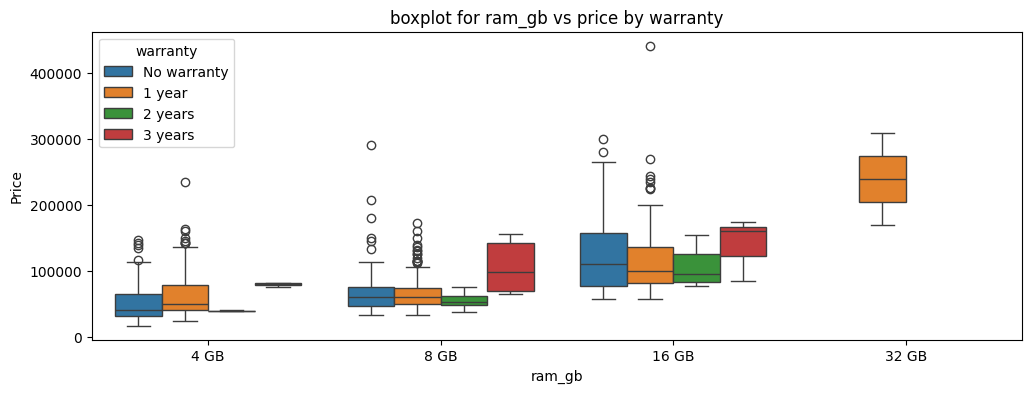

In [102]:
plt.figure(figsize=(12,4))
sns.boxplot(df,x="ram_gb",y="Price",hue="warranty")
plt.title("boxplot for ram_gb vs price by warranty")
plt.show()

# categorical vs categorical 
1. crosstab/heatmap

In [103]:
ctab1 = pd.crosstab(df["ram_gb"],df["ram_type"])
ctab1

ram_type,DDR3,DDR4,DDR5,LPDDR3,LPDDR4,LPDDR4X
ram_gb,,,,,,
16 GB,2,140,2,8,1,20
32 GB,0,2,0,0,0,0
4 GB,0,197,4,0,10,12
8 GB,5,351,2,6,16,24


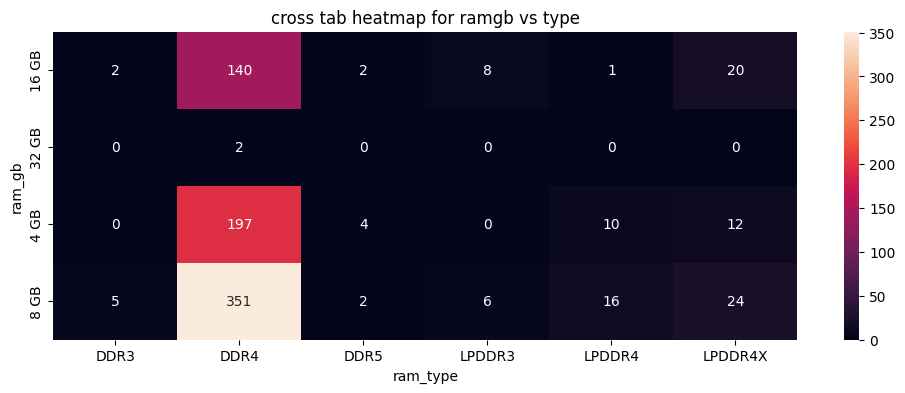

In [104]:

plt.figure(figsize=(12,4))
sns.heatmap(ctab1,annot=True,fmt="d")
plt.title("cross tab heatmap for ramgb vs type")
plt.show()

In [105]:
c2 = pd.crosstab(df["processor_brand"],df["warranty"])
c2

warranty,1 year,2 years,3 years,No warranty
processor_brand,,,,
AMD,132,0,3,54
Intel,347,23,10,214
M1,19,0,0,0


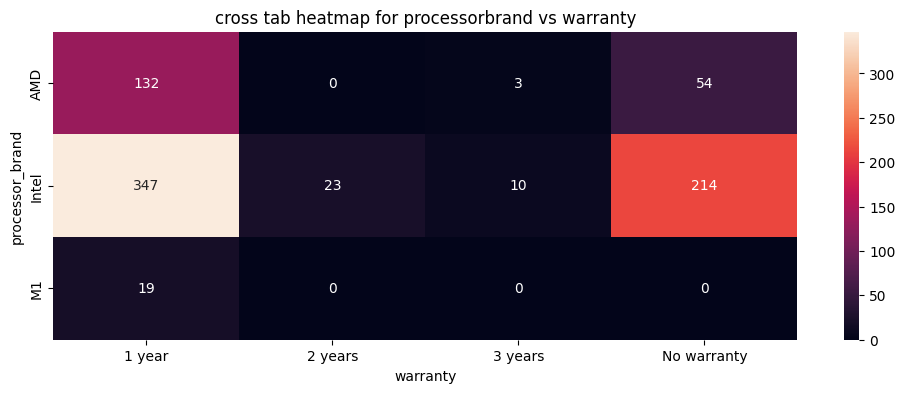

In [106]:
plt.figure(figsize=(12,4))
sns.heatmap(c2,annot=True,fmt="d")
plt.title("cross tab heatmap for processorbrand vs warranty")
plt.show()

In [107]:
c3 =pd.crosstab(df["weight"],df["Touchscreen"])
c3

Touchscreen,No,Yes
weight,,
Casual,425,84
Gaming,39,0
ThinNlight,242,12


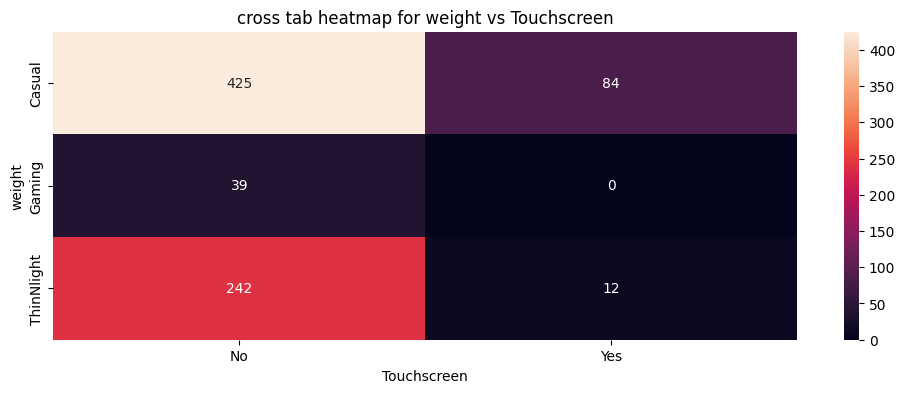

In [111]:
plt.figure(figsize=(12,4))
sns.heatmap(c3,annot=True,fmt="d")
plt.title("cross tab heatmap for weight vs Touchscreen")
plt.show()

# multivariate

In [112]:
num_cols

['Price', 'Number of Ratings', 'Number of Reviews']

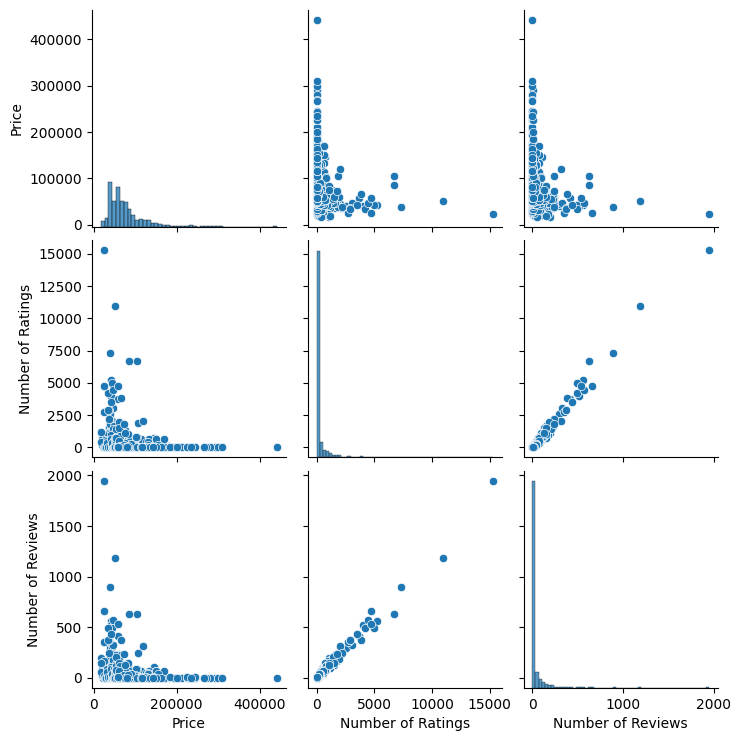

In [115]:
sns.pairplot(data=df)

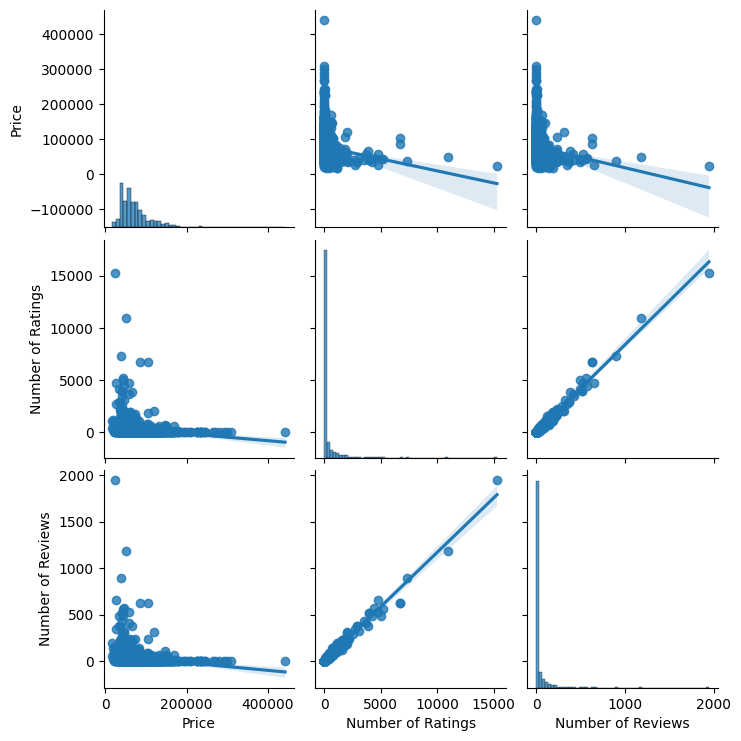

In [117]:
sns.pairplot(df,kind="reg")

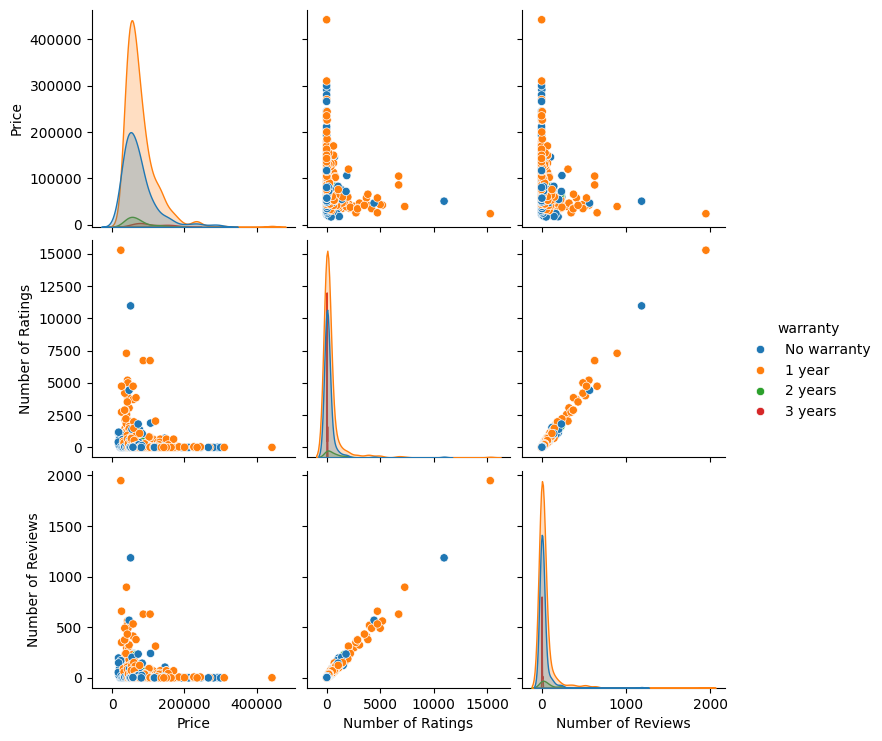

In [118]:
sns.pairplot(df,hue="warranty")

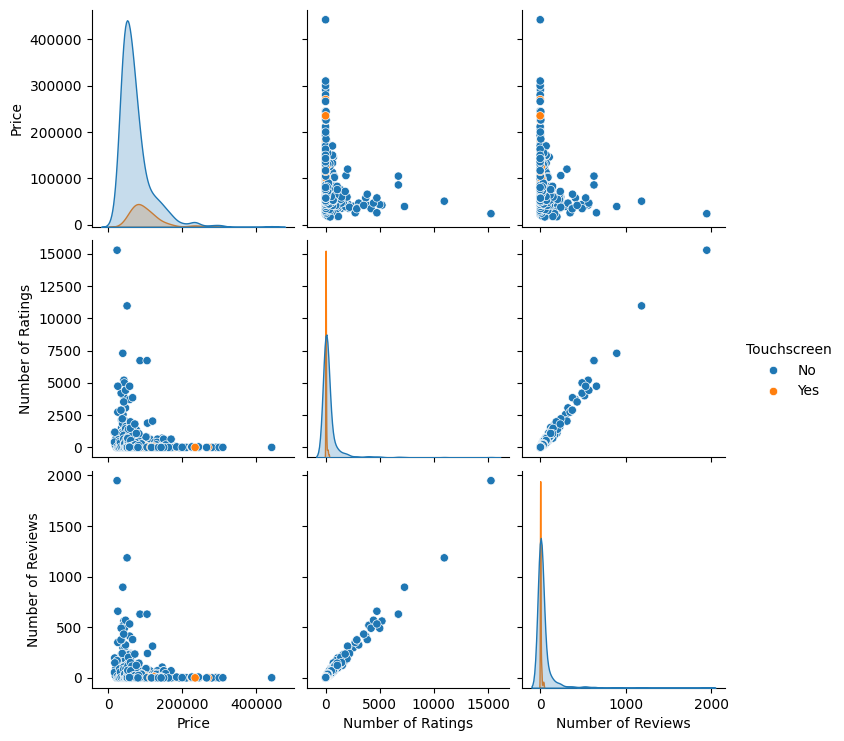

In [119]:
sns.pairplot(df,hue="Touchscreen")

In [121]:
corr =df.corr(numeric_only=True)
corr

,Price,Number of Ratings,Number of Reviews
Price,1.000000,-0.152553,-0.156791
Number of Ratings,-0.152553,1.000000,0.991062
Number of Reviews,-0.156791,0.991062,1.000000


<Axes: >

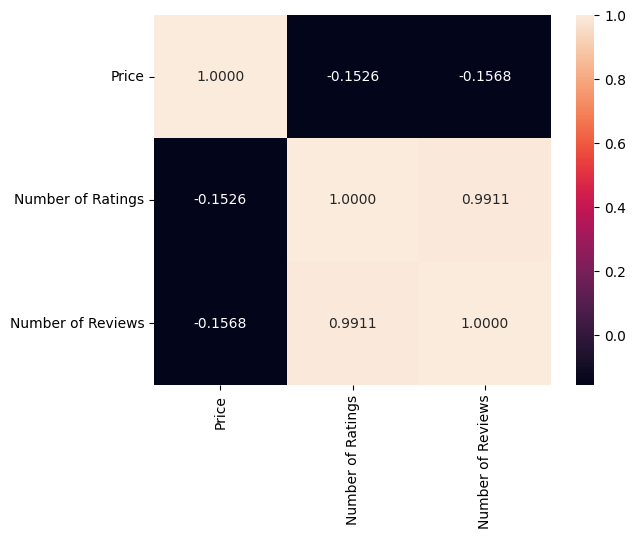

In [123]:
sns.heatmap(corr,annot=True,fmt=".4f")

# Aggregation and summarization

# q1 show avg price by manufacturer

In [126]:
a = (
    df.groupby(by="brand")
    .agg({"Price":"mean"})
    .sort_values(by="Price")
    .round(2)

)
a

,Price
brand,
Avita,56346.50
DELL,60788.95
acer,72420.04
Lenovo,72920.21
HP,73640.27
ASUS,79426.02
MSI,98713.02
APPLE,157081.30


<Axes: title={'center': 'Avg Price by brand'}, ylabel='brand'>

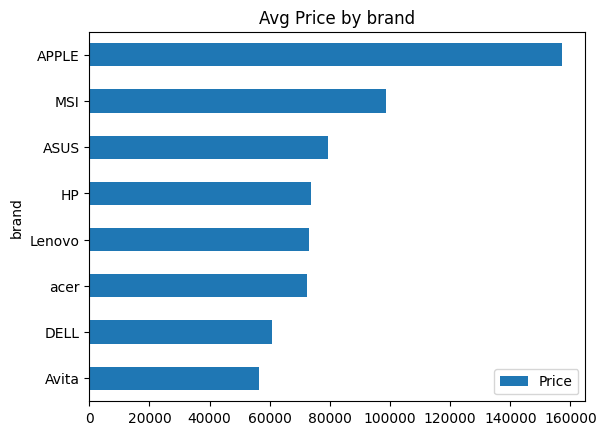

In [130]:
a.plot(kind="barh",title="Avg Price by brand")

# show the top 3 brand  by median price for touchscreen laptops

In [132]:
a = (
    df.query("Touchscreen == 'Yes'")
    .groupby(by="brand")
    .agg({"Price":"mean"})
    .nlargest(3,"Price")


)
a

,Price
brand,
MSI,154990.000000
ASUS,113320.000000
HP,111779.538462


<Axes: xlabel='brand'>

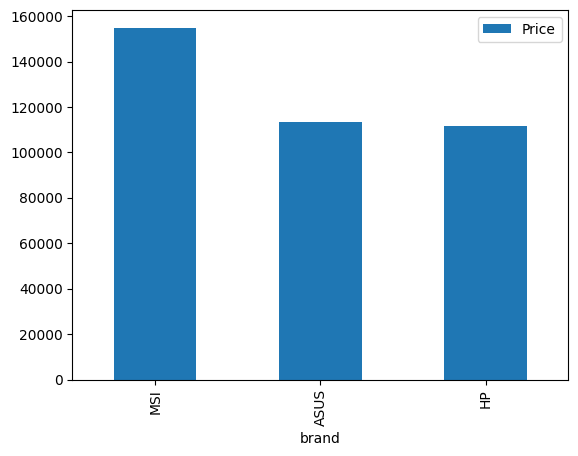

In [134]:
a.plot(kind="bar")

# show the bottom 4 laptop brand by median price for touchscreen

In [135]:
a = (
    df.query("Touchscreen == 'Yes'")
    .groupby(by="brand")
    .agg({"Price":"mean"})
    .nsmallest(3,"Price")


)
a

,Price
brand,
DELL,77475.684211
Lenovo,83944.473684
acer,95998.500000


#  show rhe avg price by processor brand and warranty

In [139]:
d = (
    df.groupby(by=["processor_brand","warranty"])
    .agg({"Price":"mean"})


)
d

Price
processor_brand warranty                  
AMD             1 year        77824.295455
                3 years       78588.000000
                No warranty   73547.518519
Intel           1 year        73326.994236
                2 years       68945.869565
                3 years      113477.200000
                No warranty   74241.799065
M1              1 year       153726.842105

<Axes: ylabel='processor_brand,warranty'>

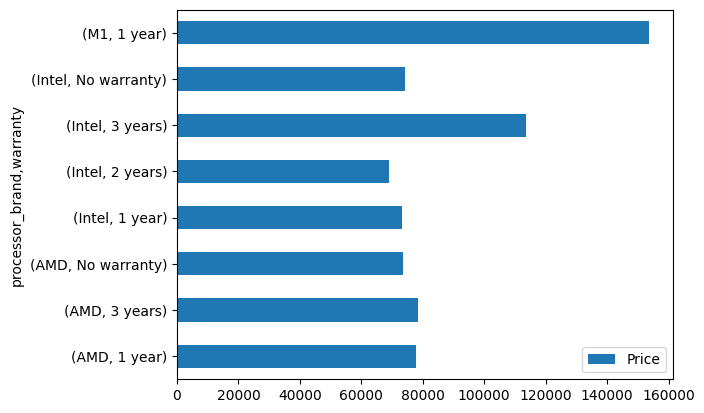

In [140]:
d.plot(kind="barh")

In [142]:
e = pd.pivot_table(
    data =df,index = "processor_brand",
    columns="warranty",
    values="Price",
    aggfunc="mean"
).round(2)

e


warranty,1 year,2 years,3 years,No warranty
processor_brand,,,,
AMD,77824.30,NaN,78588.0,73547.52
Intel,73326.99,68945.87,113477.2,74241.80
M1,153726.84,NaN,NaN,NaN


<Axes: xlabel='processor_brand'>

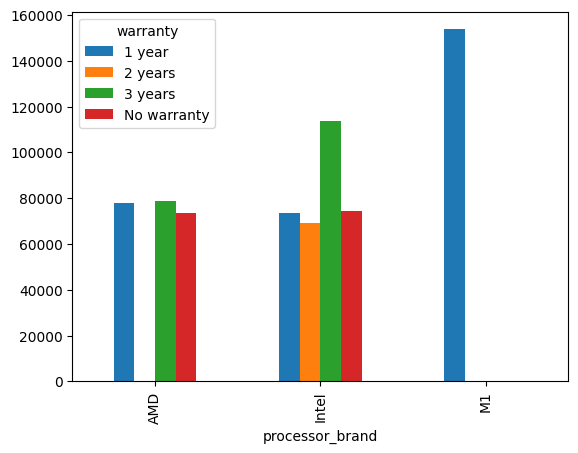

In [143]:
e.plot(kind="bar")

# show total number rating by weight and touchscreen

In [145]:
g = (
    df.groupby(by=["weight","Touchscreen"])
    .agg({"Number of Ratings":"sum"})
)
g

Number of Ratings
weight     Touchscreen                   
Casual     No                      137702
           Yes                       2306
Gaming     No                       17830
ThinNlight No                       82378
           Yes                        259

<Axes: xlabel='weight,Touchscreen'>

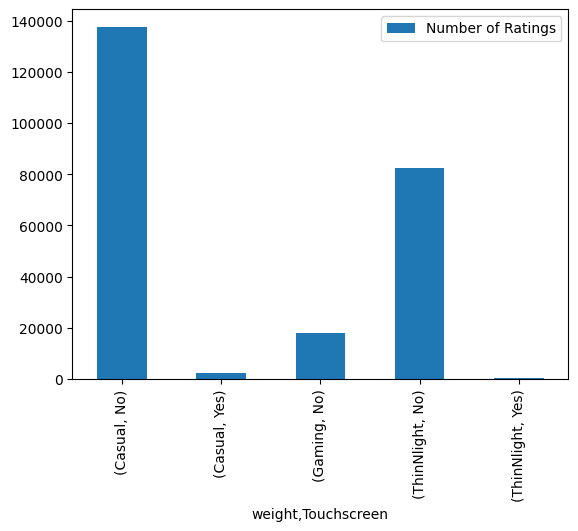

In [146]:
g.plot(kind="bar")

In [153]:
h =pd.pivot_table(
    data=df,
    index="weight",
    columns="Touchscreen",
    values="Number of Ratings",
    aggfunc="sum"
)
h

Touchscreen,No,Yes
weight,,
Casual,137702.0,2306.0
Gaming,17830.0,NaN
ThinNlight,82378.0,259.0


<Axes: xlabel='weight'>

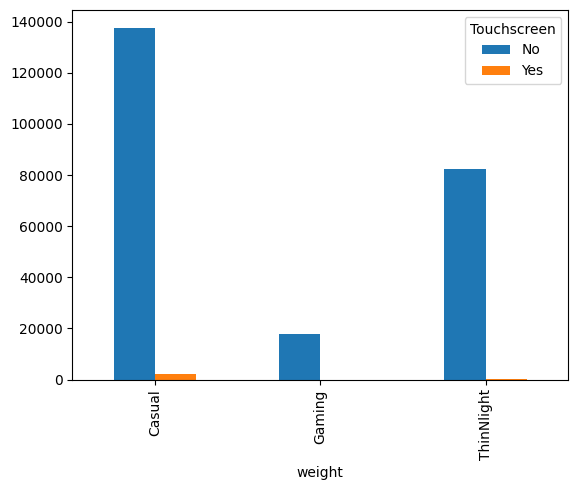

In [154]:
h.plot(kind="bar")

# show the brand with highest total number of ratings 


In [155]:
j = (
    df.groupby(by="brand")
    .agg({"Number of Ratings":"sum"})
    .nlargest(1,"Number of Ratings")
)
j

,Number of Ratings
brand,
ASUS,85624


In [156]:
k = (
    df.groupby(by="brand")
    .agg({"Number of Ratings":"sum"})
    .nsmallest(1,"Number of Ratings")
)
k

,Number of Ratings
brand,
Avita,1361
